<a href="https://colab.research.google.com/github/quadspark/basic-ml-course/blob/Week6/06_Tree/Solution6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6: Decision tree & Random forest

Good news! We don't have to implement anything from scratch today!

To make things easier, make a copy of this notebook and do the exercise in there.

Implement everywhere that has ...

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [13]:
# Load the data
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names
print(X.shape, y.shape)

(20640, 8) (20640,)


## Task 1 (1pt)

* Split the data into a training and validation set with 80%/20% distribution
* Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn for this. Remember to set the `random_state` parameter to 0 




In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, random_state = 0)

## Task 2 (1 pt)
Train a decision tree model to predict house price. Remember to use the training set `X_train` to train the model
* Train a model with `max_depth=1`. Remember to set the `random_state=0` 
* Visualize the tree you just trained. You can refer to the code from the lecture video. 
* Which feature was used to split the data (choose 1 and write you answer in a comment below the code
    * `MedInc`
    * `AveRooms`
    * `AveBedrms`
    * `HouseAge`

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# for visualization
import graphviz

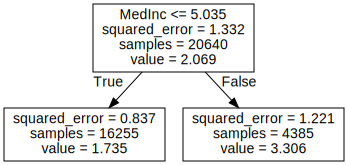

In [ ]:
# Initialize the decision tree class and train the decision tree
tree = DecisionTreeRegressor(max_depth=1,random_state=0)
tree.fit(X,y)

# Visualize the tree
graphviz.Source(export_graphviz(tree, 
                                feature_names=data['feature_names'], 
                                class_names = data['target_names']))
# Write you answer here: MedInc

## Task 3 (2pt)
* Train a decision tree with `max_depth=3`.
* Don't forget `random_state=0`
* Print the mean square error on the validation set.
* What is the mean square error you just calculate.
 Write you answer in the comment below the code.


In [ ]:
from sklearn.metrics import mean_squared_error
# Train the model
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X_train,y_train)

# Print the mean squared error
print(tree.score(X_valid,y_valid))
# What's the mean squared error you just calculate: 0.4989765792434021

0.4989765792434021


## Task 4 (2pt)
Tune the `max_depth` parameter of the model
* Try different values for `max_depth`: `[5, 6, 7, 8, 9, 10, 11, 12]`
* Don't forget `random_state=0`
* Print out the mean square error for each value of `max_depth`
* What is the best value for `max_depth`? Write you answer in the comment below the code.

In [ ]:
# Your code here
# max_depth = [5, 6, 7, 8, 9, 10, 11, 12]
for i in range(5,13):
  tree = DecisionTreeRegressor(max_depth=i, random_state = 0)
  tree.fit(X_train, y_train)
  print("for max depth" , i ,(tree.score(X_valid, y_valid)))

# What's the best max_depth: max_depth = 9 : 0.6691882365248636

for max depth 5 0.5857247671583736
for max depth 6 0.6177698126912781
for max depth 7 0.6474580599597188
for max depth 8 0.6579285437883257
for max depth 9 0.6691882365248636
for max depth 10 0.6571783546875503
for max depth 11 0.659273981958957
for max depth 12 0.6545196496283374


## Task 5 (1pt)
Let's switch to random forest

Train a random forest model with
* n_estimators=20
* random_state=0

What is the mean square error on the validation set? Write you answer in the comment below the code

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Your code here
tree = RandomForestRegressor(n_estimators = 20, random_state = 0)
tree.fit(X,y)

print(tree.score(X_valid, y_valid))
#The mean square error on the validation set :0.9681385561222473

0.9681385561222473


## Task 6 (2pt)
Tune different hyperparameter of random forest
* `random_state=0`
* Try different values for `max_features`: `[0.5, 'sqrt', 'log2']`
* For each of these values for `max_features`, try different values of `n_estimators` from 10 to 100 (with step size 10): i.e `[10, 20, 30, ...]` 
* Optionally set `n_jobs=-1` to train faster

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [10,20,30,40,50,60,70,80,90,100]
max_features = [0.5, 'sqrt', 'log2']
param_grid = dict(max_features = max_features, n_estimators = n_estimators)

dfirst = RandomForestRegressor(n_estimators = n_estimators, max_features = max_features, random_state = 0 , n_jobs = -1)
grid = GridSearchCV(estimator = dfirst, param_grid = param_grid, cv = 5)
grid_results = grid.fit(X_valid, y_valid)
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

## Task 7 (1pt)

Extract feature importance of the model
Train a random forest model with:
* `n_estimators=10`
* `max_dept=15`
* `random_state=0`

Get the feature importance attribute of the model. You can use the `feature_importances_` attibute 

What is the most important feature? write your answer in a comment in the code cell below.

In [20]:
# Train your model
forest = RandomForestRegressor(n_estimators = 10 ,max_depth = 15, random_state = 1)

forest.fit(X_train, y_train)
# Get feature importance
feature_importances = forest.feature_importances_

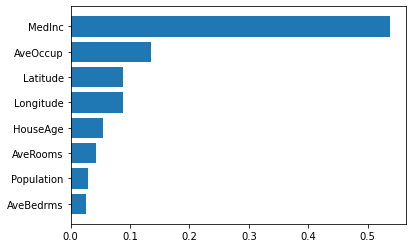

In [21]:
df_importances = pd.DataFrame()
df_importances['feature'] = feature_names
df_importances['importance'] = feature_importances
df_importances.sort_values(by='importance', inplace=True)

plt.barh(range(df_importances.shape[0]), df_importances.importance)
plt.yticks(range(df_importances.shape[0]), df_importances.feature)

plt.show()

#The most important feature: MedInc
